In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
contador = 1
def teste(row):
    global contador
    if (row['Switch'] == 'HW'):
        return contador
    else:
        retorno = contador
        contador += 1
        return retorno

In [3]:
df = pd.read_table("../Saidas/Teste3/info_parimpar.txt", sep=" ")
df["Medicao"] = df.apply (teste, axis=1)
#df.reset_index().set_index('index', drop=False)
df

,Tempo,Switch,RegrasInstaladas,RegrasAceitas,RegrasBloqueadas,BytesEnviados,Medicao
0,20,HW,18,100,5812,7015680,1
1,32,SW,253,6387,0,844743816,1
2,35,HW,22,198,12936,33073488,2
3,50,HW,54,280,13060,137877768,2
4,60,SW,363,6594,0,2836537704,2
5,60,SW,421,6594,0,4828331592,3
6,65,HW,75,327,13062,355273128,4
7,66,SW,449,6662,0,6964420176,4
8,80,HW,84,353,13082,719899488,5
9,80,SW,432,6714,0,9679618368,5


In [4]:
# Função para cálculo do intervalo de confiança de 95%
def confinterval (data):
    confidence = 0.95
    return st.sem (data) * st.t.ppf ((1 + confidence) / 2.0, len (data) - 1);

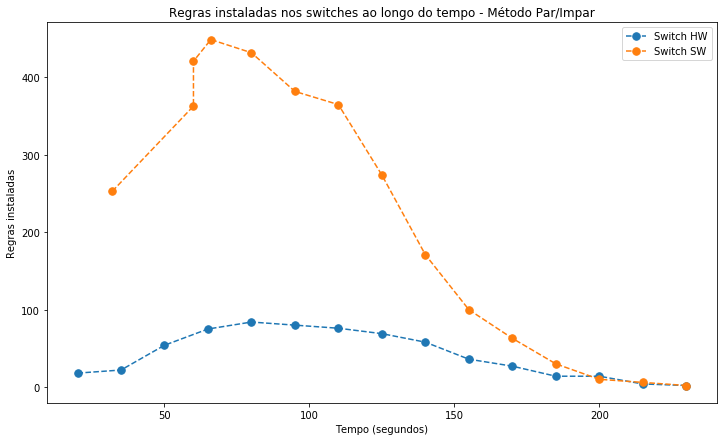

In [5]:
#Agrupando por switch
groups = df.groupby (['Switch'])
#for key,item in gpb:
    #print(gpb.get_group(key), "\n\n")

# Plot
fig, ax = plt.subplots(figsize = (12,7))
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.Tempo, group.RegrasInstaladas, marker='.', linestyle='--', ms=15, label="Switch "+name, alpha=1)
plt.xlabel('Tempo (segundos)')
plt.ylabel('Regras instaladas')
plt.title(u"Regras instaladas nos switches ao longo do tempo - Método Par/Impar") #u = unicode
ax.legend()
#plt.savefig('regrasInstaladas_Tempo_ParImpar.pdf')
plt.show()